## Computing Mathematics II - Assignment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and Cleaning

In [2]:
df = pd.read_csv("harga-rumah-teres-mengikut-negeri.csv")
df = df.dropna()
columns = list(df.columns)[2:]

# Remove commas to enable conversion to integer
for column in columns:
    curr = df[column]
    for row in curr:
        df[column] = df[column].replace(row,row.replace(",",""))

# Convert to integer
for column in columns:
    df[column] = pd.to_numeric(df[column])

print(df.dtypes)
df

Tahun              float64
Quarter             object
Malaysia             int64
Kuala Lumpur         int64
Selangor             int64
Johor                int64
Pulau Pinang         int64
Negeri Sembilan      int64
Perak                int64
Melaka               int64
Kedah                int64
Pahang               int64
Terengganu           int64
Kelantan             int64
Perlis               int64
Sabah                int64
Sarawak              int64
dtype: object


,Tahun,Quarter,Malaysia,Kuala Lumpur,Selangor,Johor,Pulau Pinang,Negeri Sembilan,Perak,Melaka,Kedah,Pahang,Terengganu,Kelantan,Perlis,Sabah,Sarawak
0,2009.0,Q1,172036,349857,212860,140992,244082,104924,101046,86222,94774,122338,98141,98464,76963,219752,195590
1,2009.0,Q2,175808,349087,219963,143912,255146,108396,98375,86500,96829,126451,98731,108736,81461,223999,195785
2,2009.0,Q3,179409,364146,226059,146453,263807,106508,98996,91309,97005,124453,104921,112986,86901,229333,184626
3,2009.0,Q4,178402,369807,230847,125652,261951,106249,102311,88931,98075,122338,107030,117508,90713,237169,197268
4,2010.0,Q1,178880,354521,233516,127928,261708,108152,101128,87102,100183,124740,105609,115352,86340,250038,190388
5,2010.0,Q2,189412,393730,245457,144630,271364,108821,103156,91774,103963,129889,113865,112098,87425,252735,193344
6,2010.0,Q3,191055,385976,252272,138311,273868,110340,105240,94906,103543,129115,111458,126504,95129,253849,203589
7,2010.0,Q4,193481,391263,261917,133292,278959,116783,107243,94264,105077,129746,118935,124809,87425,259720,213663
8,2011.0,Q1,199318,404590,268302,136057,278963,124792,111923,93704,103902,136050,114800,135099,94869,259363,209942
9,2011.0,Q2,205378,453322,281136,134527,298784,120836,113961,96257,114157,132467,127672,129069,98433,271758,202696


## Terrace House Average Prices (Malaysia) from 2009 - 2018

Average Terrace House Prices Per Year:
2009 : 176413.75
2010 : 188207.0
2011 : 207702.25
2012 : 234933.75
2013 : 256910.25
2014 : 284135.5
2015 : 303826.0
2016 : 326445.5
2017 : 355647.5
2018 : 371568.0
Average House Price Change: 0.0779025429184223


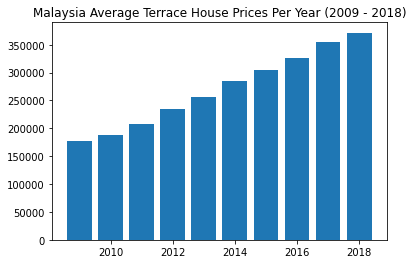

In [3]:
years = sorted(set(df["Tahun"].astype("int32")))
my_averages = {}
rates = np.array([0])

# Calculate Average Per Year Based on 4 Quarter
for year in years:
    my_averages[year] = df[df["Tahun"] == year]["Malaysia"].mean()

for i in range(2010, 2019):
    yearly_rate = (my_averages[i] - my_averages[i-1]) / my_averages[i-1]
    rates = np.append(rates, yearly_rate)

print("Average Terrace House Prices Per Year:")
for key in my_averages:
    print(f'{key} : {my_averages[key]}')

print("Average House Price Change:", np.mean(rates))

plt.bar(years, my_averages.values())
plt.title("Malaysia Average Terrace House Prices Per Year (2009 - 2018)")
plt.show()

## Least Square Method in Finding Best Fitted Linear Line

[[ 22764.18181818]
 [168140.13181818]]
Years Since 2009: 0 	| Fitted Price of House: 168140.13181818172 	| Percentage Difference: -4.69
Years Since 2009: 1 	| Fitted Price of House: 190904.31363636354 	| Percentage Difference: 1.43
Years Since 2009: 2 	| Fitted Price of House: 213668.49545454537 	| Percentage Difference: 2.87
Years Since 2009: 3 	| Fitted Price of House: 236432.6772727272 	| Percentage Difference: 0.64
Years Since 2009: 4 	| Fitted Price of House: 259196.859090909 	| Percentage Difference: 0.89
Years Since 2009: 5 	| Fitted Price of House: 281961.04090909084 	| Percentage Difference: -0.77
Years Since 2009: 6 	| Fitted Price of House: 304725.22272727266 	| Percentage Difference: 0.3
Years Since 2009: 7 	| Fitted Price of House: 327489.4045454545 	| Percentage Difference: 0.32
Years Since 2009: 8 	| Fitted Price of House: 350253.5863636363 	| Percentage Difference: -1.52
Years Since 2009: 9 	| Fitted Price of House: 373017.76818181813 	| Percentage Difference: 0.39


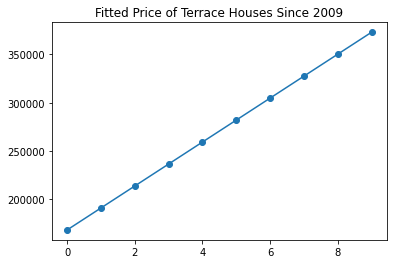

In [4]:
years_since = np.array([i for i in range(0,10)])
prices_only = np.array([[i] for i in list(my_averages.values())])

test_x = np.matrix([[2,1],[6,1],[20,1],[30,1],[40,1]])
test_y = np.matrix([[20],[18],[10],[6],[2]])

A = np.vstack((years_since, np.ones((1,10), dtype='int32'))).transpose()
x = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), prices_only))

print(x)

fit_y = [(i*x[0][0] + x[1][0]) for i in range(0,10)]

for i in range(0, 10):
    perc_diff = (fit_y[i] - prices_only[i][0]) / prices_only[i][0] * 100
    print(f"Years Since 2009: {i} \t| Fitted Price of House: {fit_y[i]} \t| Percentage Difference: {round(perc_diff,2)}")

plt.plot(years_since, fit_y, marker="o")
plt.title("Fitted Price of Terrace Houses Since 2009")
plt.show()